In [ ]:
!pip install easyocr

     |████████████████████████████████| 70.8 MB 14 kB/s 
     |████████████████████████████████| 47.6 MB 1.4 MB/s 


In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.5.4.60
Uninstalling opencv-python-headless-4.5.4.60:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.4.60.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [ ]:
#Import Library
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import cv2
import re
import json
from PIL import ImageFont, ImageDraw, Image

In [ ]:
class DebitInformation:
  valid_payment = ["visa", "mastercard", "gpn"]
  valid_bank = ["bni", "bsi", "mandiri", "jenius", "muamalat", "bca"]

  def __init__(self):

    self.bank_name = ""
    self.card_number = ""
    self.expired_date = ""
    self.name = ""
    self.payment = ""

In [ ]:
class DebitOCR:
  def __init__(self, img_path):
    self.image = img_path
    self.result = DebitInformation()
    self.process()

  def process(self):
    reader = easyocr.Reader(['en', 'id'])
    raw_text = reader.readtext(self.image, detail = 0, width_ths = 1)
    self.extract(doc = raw_text)

  def extract(self, doc):
    while("" in doc):
      doc.remove("")

    for text in doc:

      #print(doc)

      if len(text) >= 19:
        self.result.card_number = text
        doc.remove(text)
        continue
    #Nama

      for word in text.split(" "):
        # Nama bank
        if word.lower() in self.result.valid_bank:
          self.result.bank_name = word
          doc.remove(text)
          continue
        #Deteksi Payment Category
        if word.lower() in self.result.valid_payment:
          self.result.payment = word
          doc.remove(text)
          continue

      for word in text.split(" "):

        #Exp Date
        if "/" in word:
          self.result.expired_date = text[-5:] #word[0]
          doc.remove(text)
          continue

  def to_json(self):
    return json.dumps(self.result.__dict__, indent=4)

In [ ]:
def scan(img):
  ocr     = DebitOCR(img_path = '/content/' + img)
  result  = ocr.to_json()
  print(result)

#Read Multi Image
import glob

path ="*.*"
img_number = 1

for file in glob.glob(path):
    print(file)
    scan(file)
    img_number +=1

Debet_Muamalat.jpg
{
    "bank_name": "Muamalat",
    "card_number": "",
    "expired_date": "00/00",
    "name": "",
    "payment": "VISA"
}
Debet_BNI.jpg
{
    "bank_name": "BNI",
    "card_number": "5269 2100 1234 5678",
    "expired_date": "03/22",
    "name": "",
    "payment": "mastercard"
}
Debet_BSI.png
{
    "bank_name": "BSI",
    "card_number": "",
    "expired_date": "12/24",
    "name": "",
    "payment": "VISA"
}
Debet_Jenius.jpeg
{
    "bank_name": "Jenius",
    "card_number": "",
    "expired_date": "04/18",
    "name": "",
    "payment": "GPN"
}


In [ ]:
# Baca Seluruh Data di Kartu Debet

import glob
reader = easyocr.Reader(['en', 'id'])
path ="*.*"
img_number = 1

def data_kartu(img):
  result = reader.readtext(file, detail = 0, width_ths = 1)
  #result  = ocr.to_json()
  print(result)

for file in glob.glob(path):
  print(file)
  data_kartu(file)
  img_number +=1

Debet_Muamalat.jpg
['Bank Muamalat', '4217 1234 67', '0880', 'Valid Thru', '00/00', 'John Smith', 'VISA']
Debet_BNI.jpg
['Garuda Indonesıa', 'BNI', 'D EB / T', '5269 2100 1234 5678', 'PLATINUM', '5269', 'sinCBER', '17', 'YAHP 03/22', 'PUTRA NAGARA', 'mastercard', 'GARUDAMILES', '123456789']
Debet_BSI.png
['BSI', 'PLATINUM', 'DEBIT', '6034 9400', 'Yab 12/24', 'CARD HGLDER NAGIE', 'VISA']
Debet_Jenius.jpeg
['Jenius', '1234   5678   1234   5678', '1224', 'VALID THRU', '04/18', 'Dave Hidayat', 'GPN']


Debet_Muamalat.jpg


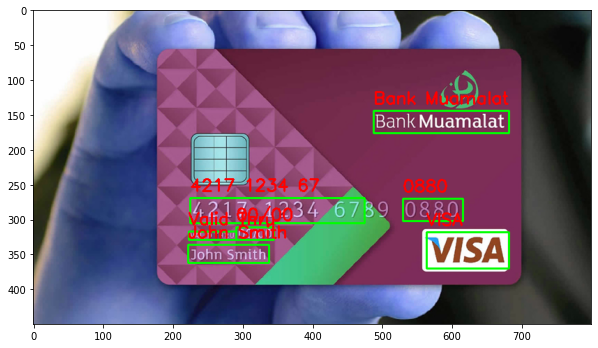

Debet_BNI.jpg


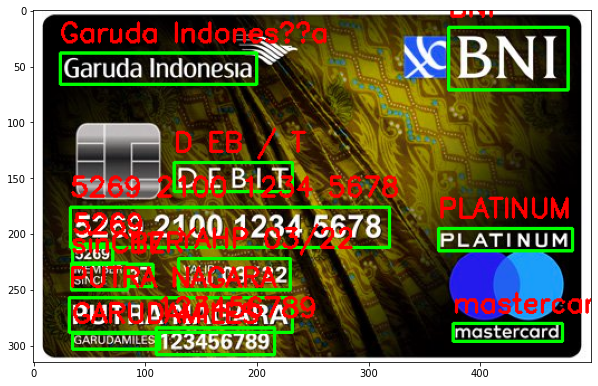

Debet_BSI.png


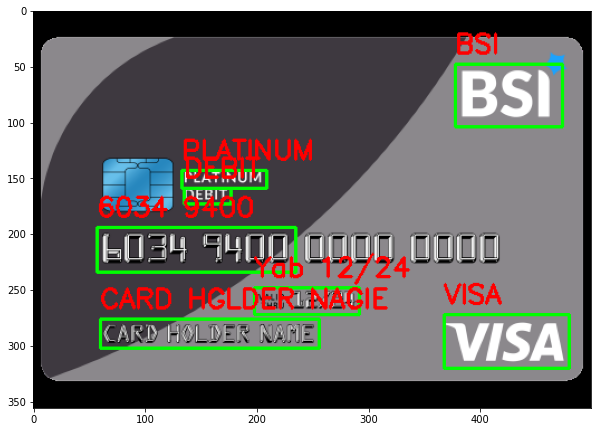

Debet_Jenius.jpeg


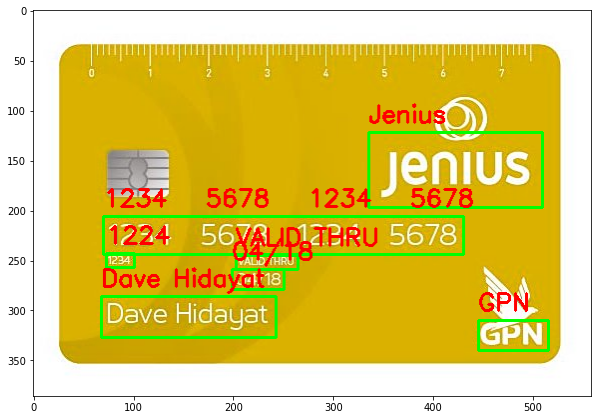

In [ ]:
import glob
reader = easyocr.Reader(['en', 'id'])
path ="*.*"
img_number = 1

def foto_kartu(img):
  image = cv2.imread(file)
  res = reader.readtext(file, width_ths = 1)
  for (bbox, text, prob) in res:
    # unpack the bounding box
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    cv2.rectangle(image, tl, br, (0, 255, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
  plt.rcParams['figure.figsize'] = (10,10)
  plt.imshow(image)
  plt.show()

for file in glob.glob(path):
  print(file)
  foto_kartu(file)
  img_number +=1